In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils as u
import init
init.run()

In [2]:
df = pd.read_csv("data/vehicles/ev_counts.csv")
df_pop = pd.read_csv("data/vehicles/ev_counts_from_pop.csv")

In [3]:
# df = df[df["time"] == "2022-08-31"]
df = df[df["time"] == "2022-09-30"]

In [4]:
columns = ["census_tract", "n_ev", "n_bev", "n_phev"]
df = df[columns]
df_pop = df_pop[columns]
df = df.set_index("census_tract")
df_pop = df_pop.set_index("census_tract")
n_census_tracts = len(df.index)

In [5]:
df.describe()

,n_ev,n_bev,n_phev
count,1765.000000,1756.000000,1719.000000
mean,60.609632,46.127563,15.111111
std,64.047796,52.831299,13.486935
min,1.000000,1.000000,1.000000
25%,18.000000,12.000000,6.000000
50%,39.000000,27.000000,12.000000
75%,78.000000,59.000000,20.000000
max,524.000000,450.000000,210.000000


In [6]:
df_pop.describe()

,n_ev,n_bev,n_phev
count,1766.000000,1755.000000,1732.000000
mean,61.575878,46.455271,15.712471
std,63.725319,51.914396,14.194506
min,1.000000,1.000000,1.000000
25%,19.000000,12.000000,6.000000
50%,41.000000,29.000000,12.000000
75%,79.000000,59.000000,21.000000
max,516.000000,433.000000,189.000000


In [7]:
ratio = df/df_pop
ratio

,n_ev,n_bev,n_phev
census_tract,,,
53001950100,0.900000,1.00,0.800000
53001950200,1.000000,1.00,NaN
53001950301,0.800000,0.75,1.000000
53001950302,1.000000,NaN,1.000000
53001950303,0.833333,1.00,0.666667
...,...,...,...
53077940003,1.000000,1.00,1.000000
53077940005,1.000000,1.00,NaN
53077940006,1.000000,1.00,NaN


In [8]:
ratio.describe()

,n_ev,n_bev,n_phev
count,1763.000000,1754.000000,1717.000000
mean,0.971610,0.980498,0.963679
std,0.108489,0.131039,0.160773
min,0.095238,0.139738,0.090909
25%,0.935484,0.934691,0.892857
50%,1.000000,1.000000,1.000000
75%,1.019231,1.029412,1.000000
max,1.500000,3.000000,3.000000


In [9]:
dev_pct = 10 #%
dev = 10
n_within_pct = (np.absolute(ratio["n_ev"]-1) < dev_pct/100).sum()
n_within     = (np.absolute(df["n_ev"]-df_pop["n_ev"]) < dev).sum()
n_smaller_dev = (df_pop["n_ev"] < dev).sum()
df_smaller_3dev = df[df["n_ev"] < 3*dev]
df_pop_smaller_3dev = df_pop[df_pop["n_ev"] < 3*dev]
n_n_smaller_3dev = len(df_pop_smaller_3dev)
n_n_smaller_3dev_n_within = (np.absolute(df_smaller_3dev["n_ev"]-df_pop_smaller_3dev["n_ev"]) < dev/2).sum()

print("Within +/-{0:.1f}%: {1:.0f}/{2:.0f} = {3:.1f}%".format(dev_pct, n_within_pct, n_census_tracts, n_within_pct/n_census_tracts*100))
print("Within +/-{0:.0f}:    {1:.0f}/{2:.0f} = {3:.1f}%".format(dev, n_within, n_census_tracts, n_within/n_census_tracts*100))
print("Smaller than {0:.0f}: {1:.0f}/{2:.0f} = {3:.1f}%".format(dev, n_smaller_dev, n_census_tracts, n_smaller_dev/n_census_tracts*100))
print("Of the ones smaller than {0:.0f}:\n\tWithin +/-{1:.0f}: {2:.0f}/{3:.0f} = {4:.1f}%".format(3*dev, dev/2, n_n_smaller_3dev_n_within, n_n_smaller_3dev, n_n_smaller_3dev_n_within/n_n_smaller_3dev*100))

Within +/-10.0%: 1410/1784 = 79.0%
Within +/-10:    1703/1784 = 95.5%
Smaller than 10: 195/1784 = 10.9%
Of the ones smaller than 30:
	Within +/-5: 666/691 = 96.4%


In [10]:
ratio_smaller_3dev = df_smaller_3dev/df_pop_smaller_3dev
ratio_smaller_3dev.describe()

,n_ev,n_bev,n_phev
count,682.000000,673.000000,637.000000
mean,0.957076,0.969656,0.962955
std,0.138309,0.179292,0.217187
min,0.200000,0.200000,0.312500
25%,0.892857,0.888889,0.857143
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.500000,3.000000,3.000000


In [14]:
[i for i in range(0,501,100)]

[0, 100, 200, 300, 400]

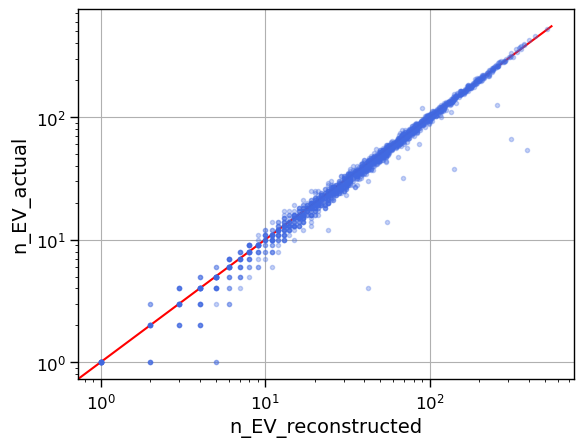

In [25]:
fig,ax = u.plot(df_pop["n_ev"], df["n_ev"], alpha=0.3, zorder=2)
ax.plot(range(0,551,10), range(0,551,10), color="red", zorder=1)
# ax.set_xlim((0,2))
u.fig_ax_setup(fig, xlabel="n_EV_reconstructed", ylabel="n_EV_actual")
u.fig_ax_setup(fig, xscale="log", yscale="log")
u.save_figure(fig, filename="plots/n_EV_reconstructed_vs_actual_scatter_logscale.png", dpi=200)

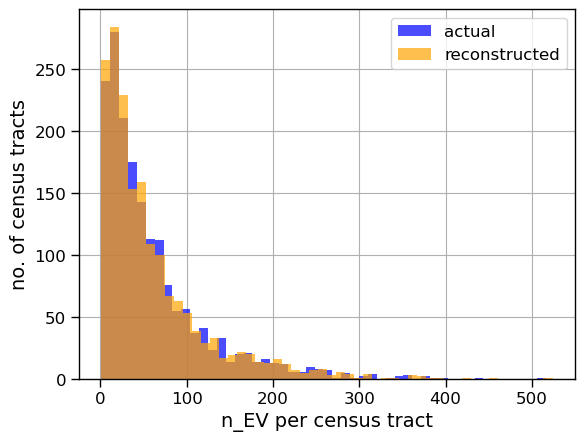

In [64]:
nbins = 50
xlim = (-25, 550)
ylim = (0, 298)

ax = df_pop["n_ev"].hist(bins=nbins, alpha=0.7, color="blue", label="actual")
ax = df["n_ev"].hist(bins=nbins, alpha=0.7, color="orange", label="reconstructed")
fig = plt.gcf()
u.fig_ax_setup(fig, xlabel="n_EV per census tract", ylabel="no. of census tracts", xlim=xlim, ylim=ylim)
u.save_figure(fig, filename="plots/n_EV_hist.png", dpi=200)

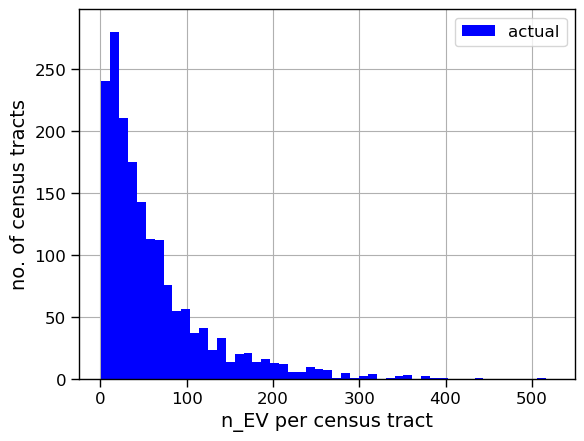

In [65]:
ax = df_pop["n_ev"].hist(bins=nbins, color="blue", label="actual")
fig = plt.gcf()
u.fig_ax_setup(fig, xlabel="n_EV per census tract", ylabel="no. of census tracts", xlim=xlim, ylim=ylim)
u.save_figure(fig, filename="plots/n_EV_actual_hist.png", dpi=200)

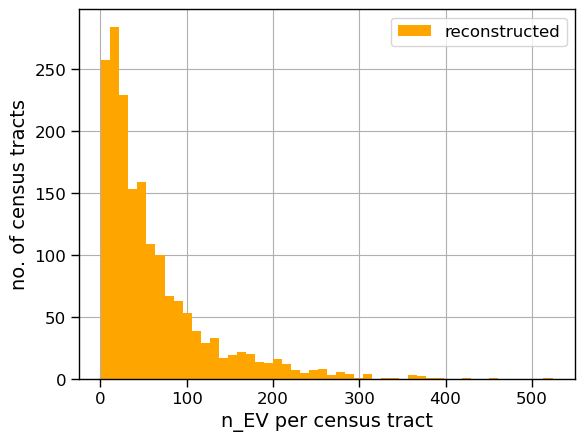

In [66]:
ax = df["n_ev"].hist(bins=nbins, color="orange", label="reconstructed")
fig = plt.gcf()
u.fig_ax_setup(fig, xlabel="n_EV per census tract", ylabel="no. of census tracts", xlim=xlim, ylim=ylim)
u.save_figure(fig, filename="plots/n_EV_reconstructed_hist.png", dpi=200)

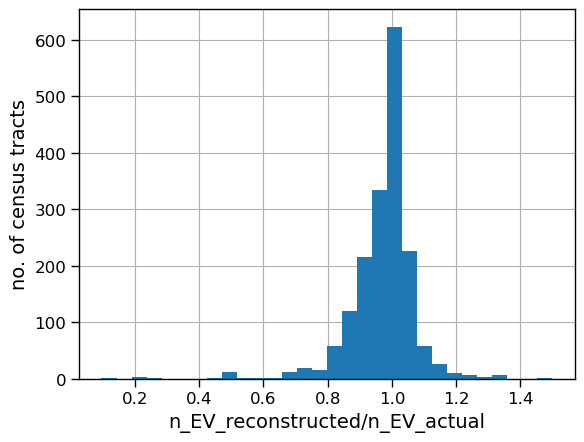

In [15]:
ax = ratio["n_ev"].hist(bins=30)
fig = plt.gcf()
u.fig_ax_setup(fig, xlabel="n_EV_reconstructed/n_EV_actual", ylabel="no. of census tracts")
u.save_figure(fig, filename="plots/n_EV_reconstructed_n_EV_actual_hist.png", dpi=200)

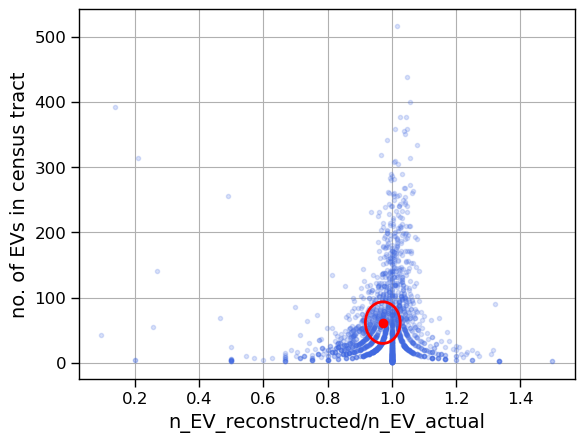

In [16]:
from matplotlib.patches import Ellipse
fig,ax = u.plot(ratio["n_ev"], df_pop["n_ev"], alpha=0.2)
ax.scatter(ratio.describe().loc["mean", "n_ev"], df_pop["n_ev"].mean(), color="red")
ellipse = Ellipse(xy=(ratio.describe().loc["mean", "n_ev"], df_pop["n_ev"].mean()), width=ratio.describe().loc["std", "n_ev"], height=df_pop["n_ev"].std(),
                  edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
# ax.set_xlim((0,2))
u.fig_ax_setup(fig, xlabel="n_EV_reconstructed/n_EV_actual", ylabel="no. of EVs in census tract")
u.save_figure(fig, filename="plots/n_EV_reconstructed_vs_actual_vs_n_EV_scatter.png", dpi=200)